# **Data Science for Decision Support**


**Executor:** Raniyaharini Rajendran

---
Individual data variant:

 | Task1, Q3 | Task 3 Q2a | Task 3 Q2b    | Task 3 Q3bc |
| ----------- | ----------- | ----------- | ----------- | ----------- |
| 90:10       | Checkbox    | MultipleSelect| Page 3 – Hyperparameters
                                                        Page 2 - forecasts         |







# Problem: **Classification** 

# **`Task 1 “Data Analysis” `**

1)	Read the data from your individual variant into Python notebook

In [1]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [2]:
#Write your code here 
import pandas as pd 
import numpy as np 
import sklearn 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics,svm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost 
from catboost import CatBoostClassifier
import lightgbm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
import time
import random
from scipy.stats import uniform, randint
import ipywidgets as widgets
from IPython.display import clear_output

In [3]:
#add more cell if needed to each code cell
heart_df = pd.read_csv('heart.csv')

In [4]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
heart_df.describe(include = 'all')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.510893,NaN,NaN,132.396514,198.799564,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,9.432617,NaN,NaN,18.514154,109.384145,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,173.250000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


2) Copy all necessary pre-processing steps from assignment 1.2. Scale your whole dataset.  Scale your whole dataset with Standard Scaler. 

In [6]:
#Write your code here
#Converting categorical into numerical values
le = LabelEncoder()
heart_df['Sex']=le.fit_transform(heart_df['Sex'])
heart_df['RestingECG']=le.fit_transform(heart_df['RestingECG'])
heart_df['ChestPainType']=le.fit_transform(heart_df['ChestPainType'])
heart_df['ExerciseAngina']=le.fit_transform(heart_df['ExerciseAngina'])
heart_df['ST_Slope']=le.fit_transform(heart_df['ST_Slope'])

heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


In [7]:
#Checking for NAN values
heart_df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [9]:
heart_df.corr()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,1.000000,0.055750,-0.077150,0.254399,-0.095282,0.198039,-0.007484,-0.382045,0.215793,0.258612,-0.268264,0.282039
Sex,0.055750,1.000000,-0.126559,0.005133,-0.200092,0.120076,0.071552,-0.189186,0.190664,0.105734,-0.150693,0.305445
ChestPainType,-0.077150,-0.126559,1.000000,-0.020647,0.067880,-0.073151,-0.072537,0.289123,-0.354727,-0.177377,0.213521,-0.386828
RestingBP,0.254399,0.005133,-0.020647,1.000000,0.100893,0.070193,0.022656,-0.112135,0.155101,0.164803,-0.075162,0.107589
Cholesterol,-0.095282,-0.200092,0.067880,0.100893,1.000000,-0.260974,-0.196544,0.235792,-0.034166,0.050148,0.111471,-0.232741
FastingBS,0.198039,0.120076,-0.073151,0.070193,-0.260974,1.000000,0.087050,-0.131438,0.060451,0.052698,-0.175774,0.267291
RestingECG,-0.007484,0.071552,-0.072537,0.022656,-0.196544,0.087050,1.000000,-0.179276,0.077500,-0.020438,-0.006778,0.057384
MaxHR,-0.382045,-0.189186,0.289123,-0.112135,0.235792,-0.131438,-0.179276,1.000000,-0.370425,-0.160691,0.343419,-0.400421
ExerciseAngina,0.215793,0.190664,-0.354727,0.155101,-0.034166,0.060451,0.077500,-0.370425,1.000000,0.408752,-0.428706,0.494282
Oldpeak,0.258612,0.105734,-0.177377,0.164803,0.050148,0.052698,-0.020438,-0.160691,0.408752,1.000000,-0.501921,0.403951


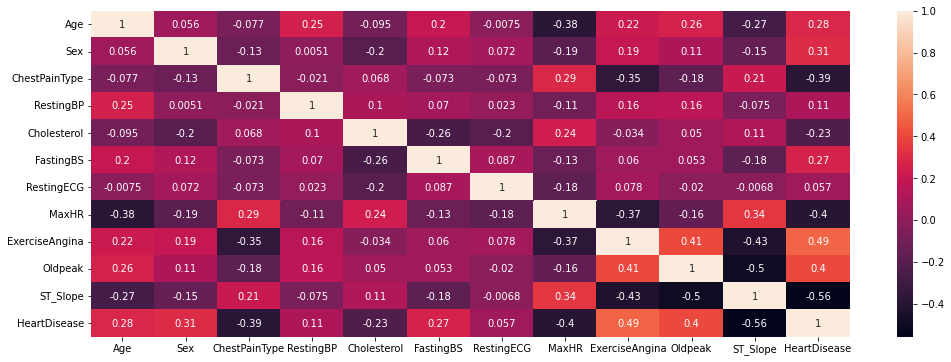

In [9]:
#Heatmap
plt.figure(figsize=(17,6))
sns.heatmap(heart_df.corr(),annot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdd357b1290>,
      dtype=object)

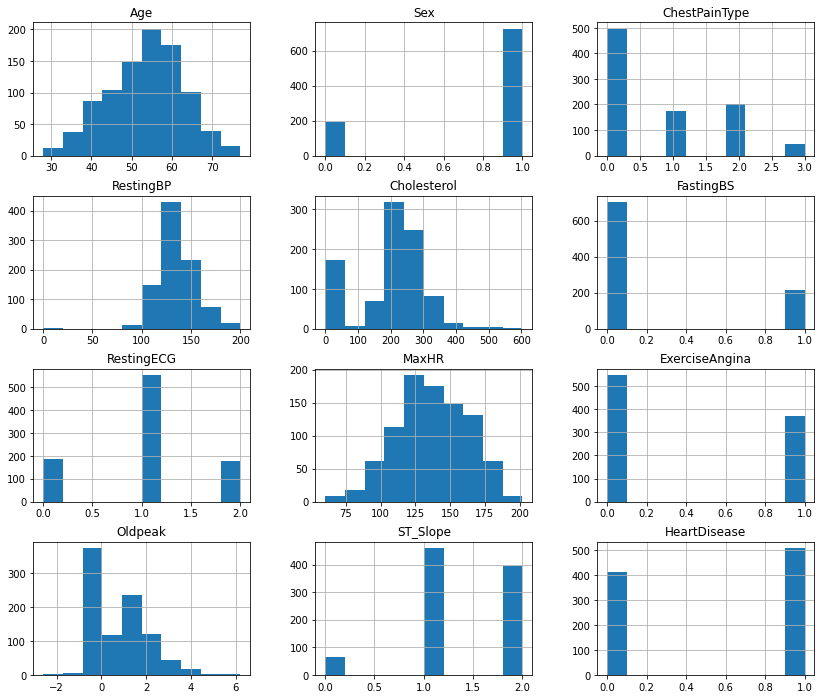

In [10]:
#Building 2D dependencies between each pair of variables
heart_df.hist(figsize = (14,12))

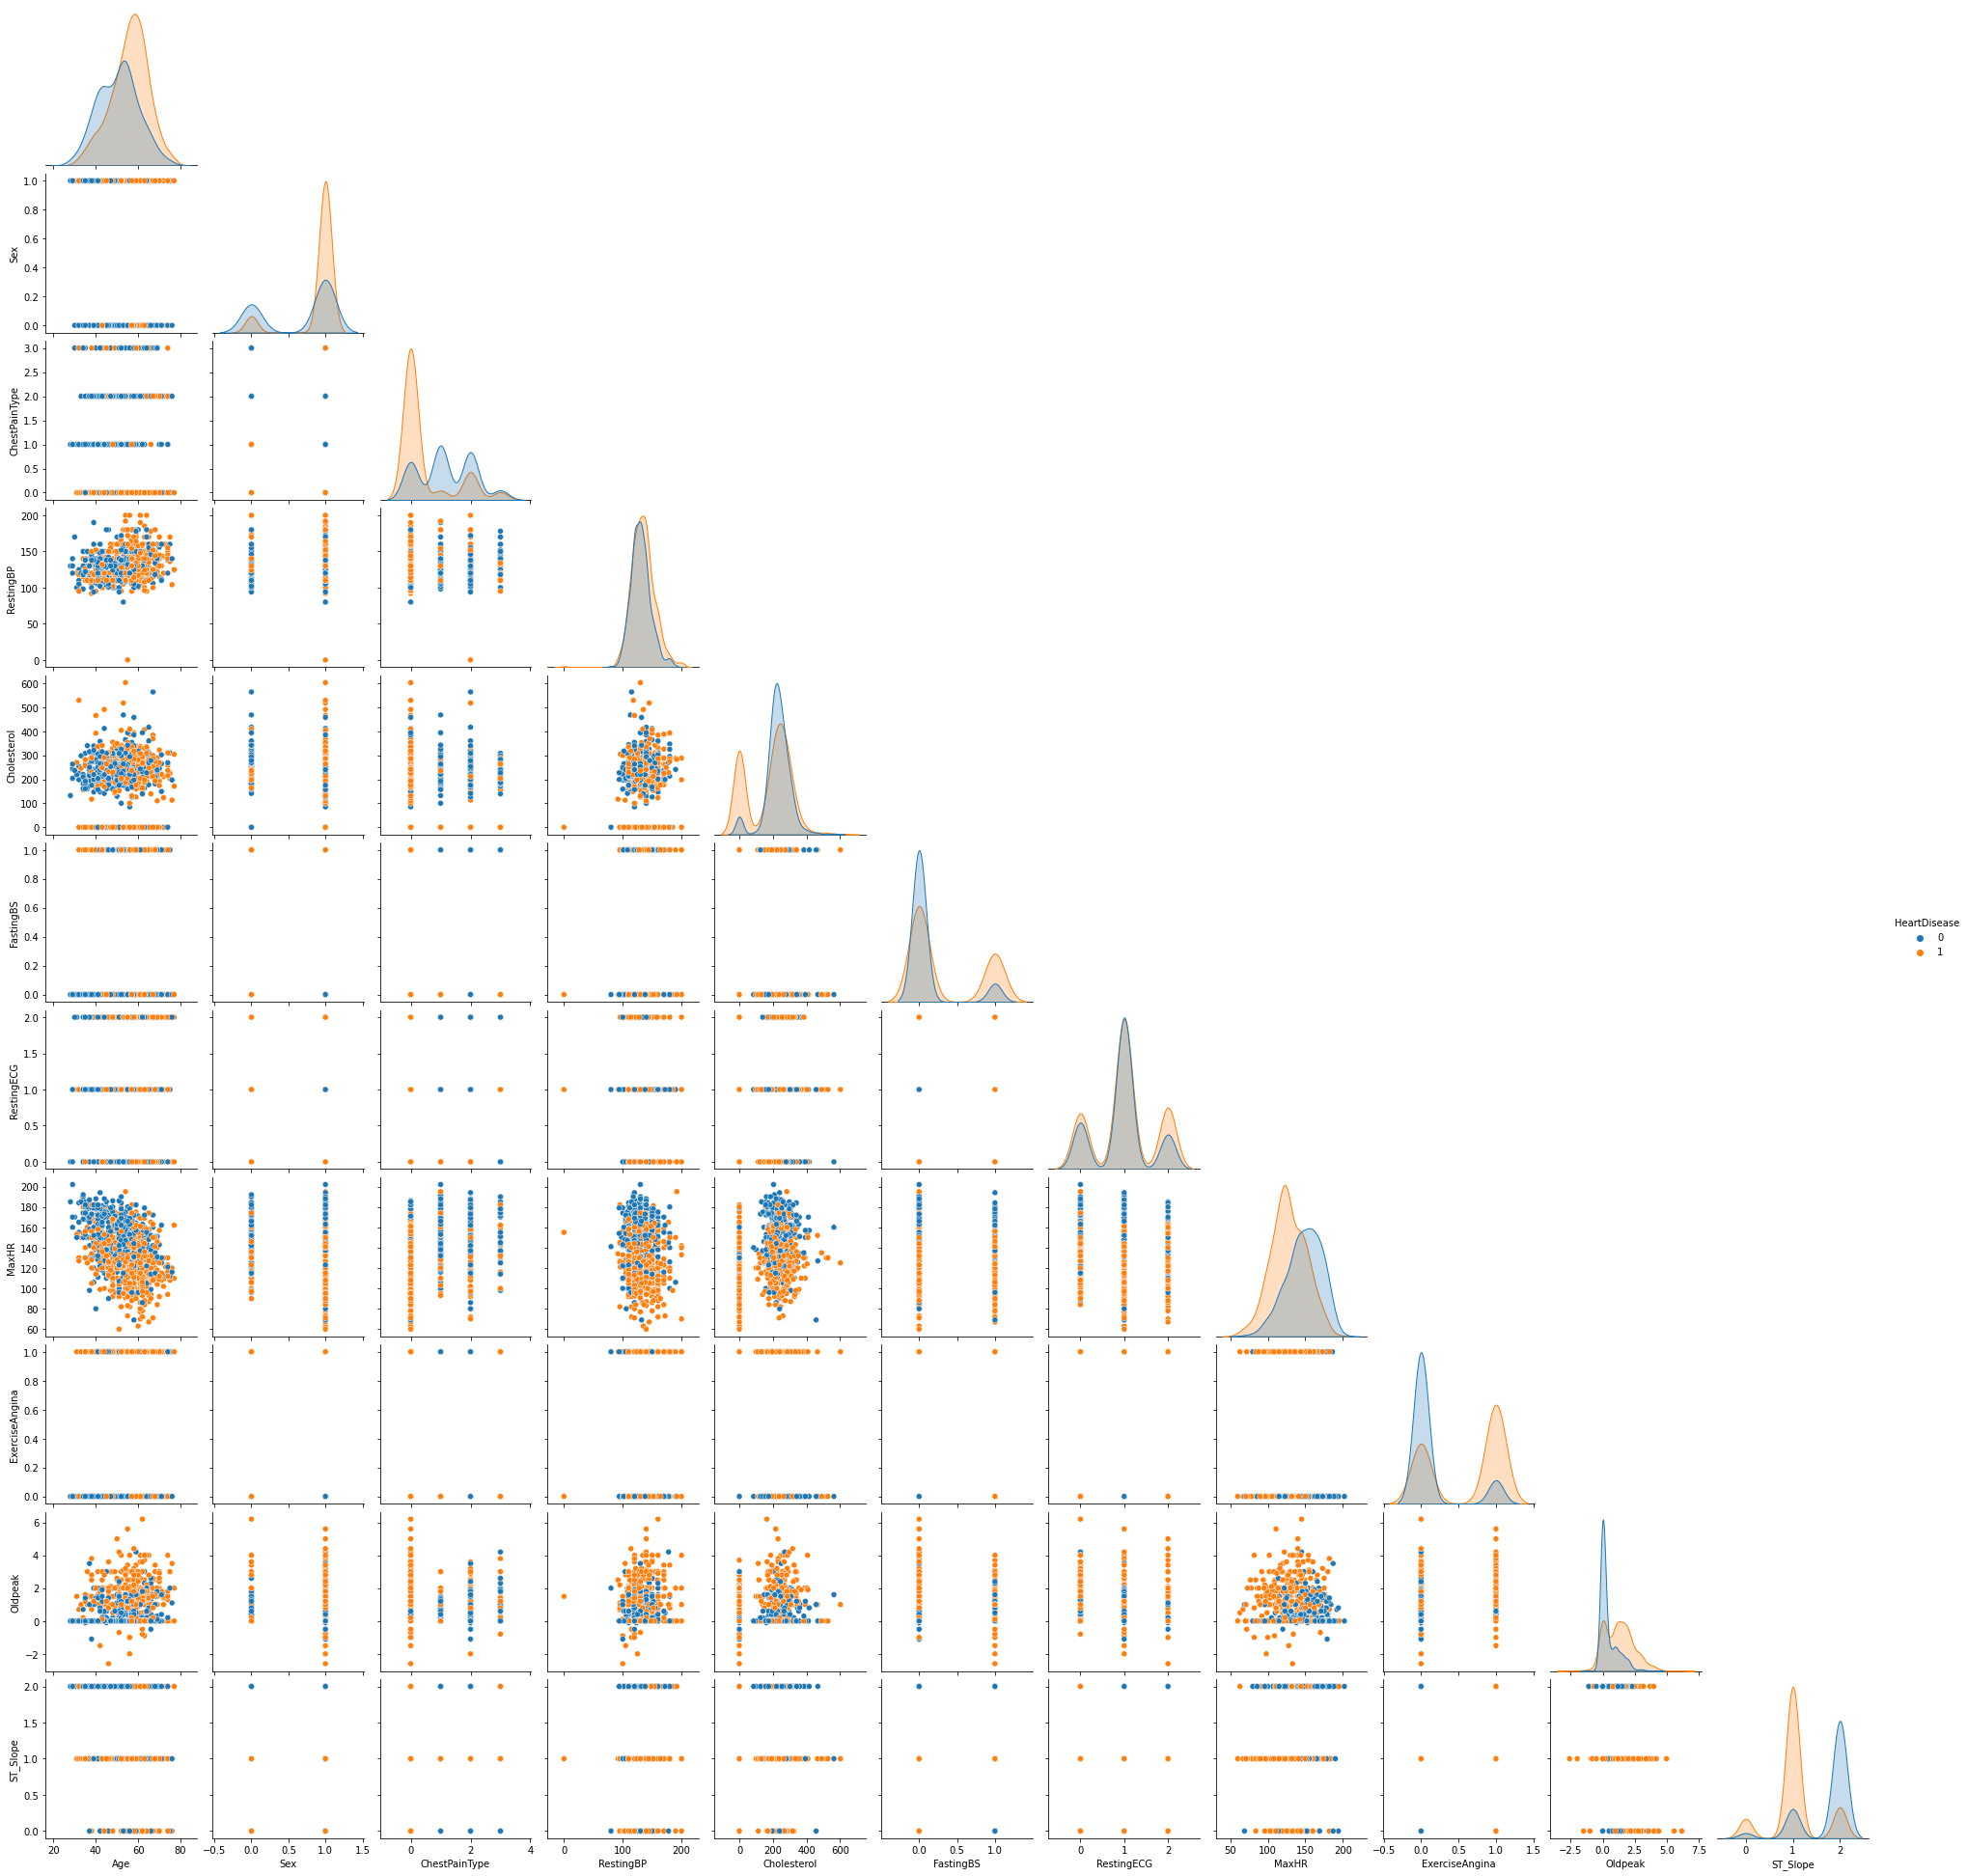

In [12]:
sns.pairplot(heart_df,hue='HeartDisease',corner=True)

The older you are the more likely it is to have a heart disease

3) Divide your dataset into 2 parts: training set and test set **(take the propostion from individual variant)**. Output the dimension of the resulting datasets.


In [8]:
#Write your code here 
X = heart_df.drop(["HeartDisease"], axis =1)
y = heart_df["HeartDisease"]


In [9]:
# training set and testing set (90:10)
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.10, random_state=42)

In [10]:
X_train.shape

(826, 11)

In [16]:
X_test.shape

(92, 11)

In [11]:
 #training set and testing set (80:20)
X_train1, X_test1 , y_train1, y_test1 = train_test_split(X,y,test_size = 0.20, random_state=42)

In [18]:
X_train1.shape

(734, 11)

In [19]:
X_test1.shape

(184, 11)

In [12]:
 #training set and testing set (85:15)
X_train2, X_test2 , y_train2, y_test2 = train_test_split(X,y,test_size = 0.15, random_state=42)

In [21]:
X_train2.shape

(780, 11)

In [22]:
X_test2.shape

(138, 11)

In [13]:
#Standard Scaler
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

4) **Preliminary analysis:**  For each model: train with training set and output the confusion matrix of the model using training set. Calculate accuracy, precision, recall, F1 metrics over training set. Is precision or recall more important for description of your data? Build the ROC_AUC curve. Test your models with a testset and output the confusion matrix. Compare the same performance metrics calculated inside one model for training and test sets. 

**Random Forest classifier**

Random Forest Classifier
              precision    recall  f1-score   support

           0       0.86      0.84      0.85        38
           1       0.89      0.91      0.90        54

    accuracy                           0.88        92
   macro avg       0.88      0.87      0.88        92
weighted avg       0.88      0.88      0.88        92

Confusion Matrix
 [[32  6]
 [ 5 49]]


-----AUC Plot and ROC Curve-----


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


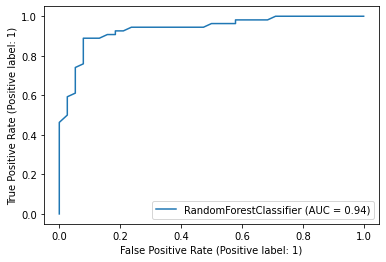

In [14]:
#Write your code for Random forest regression here 
classifier1 = RandomForestClassifier()
classifier1.fit(X_train, y_train)

y_pred = classifier1.predict(X_test)

print("Random Forest Classifier")
#accuracy, precision, recall, F1 metrics
print(classification_report(y_test, y_pred))

#Confusion Matrix
print('Confusion Matrix\n',metrics.confusion_matrix(y_test, y_pred))
print('\n')

#AUC plot and ROC curve
print('-----AUC Plot and ROC Curve-----')
metrics.plot_roc_curve(classifier1,X_test, y_test) 
plt.show()
print('\n')

*Comment the results of the previous program* 

**XGBoost classifier**

XGBoost Classifier
              precision    recall  f1-score   support

           0       0.92      0.89      0.91        38
           1       0.93      0.94      0.94        54

    accuracy                           0.92        92
   macro avg       0.92      0.92      0.92        92
weighted avg       0.92      0.92      0.92        92

Confusion Matrix
 [[34  4]
 [ 3 51]]


-----AUC Plot and ROC Curve-----


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


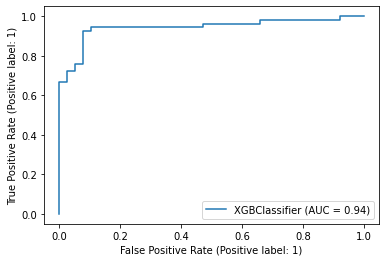

In [15]:
#Write your code for XGBoost regression here 
classifier2 = xgboost.XGBClassifier()
classifier2.fit(X_train, y_train)

y_pred = classifier2.predict(X_test)

print("XGBoost Classifier")
#accuracy, precision, recall, F1 metrics
print(classification_report(y_test, y_pred))

#Confusion Matrix
print('Confusion Matrix\n',metrics.confusion_matrix(y_test, y_pred))
print('\n')

#AUC plot and ROC curve
print('-----AUC Plot and ROC Curve-----')
metrics.plot_roc_curve(classifier2,X_test, y_test) 
plt.show()
print('\n')

*Comment the results of the previous program* 

**Cat Boost classifier**

Learning rate set to 0.009495
0:	learn: 0.6844900	total: 48.2ms	remaining: 48.1s
1:	learn: 0.6767899	total: 49.9ms	remaining: 24.9s
2:	learn: 0.6695480	total: 51.6ms	remaining: 17.1s
3:	learn: 0.6618627	total: 53.1ms	remaining: 13.2s
4:	learn: 0.6538726	total: 54.7ms	remaining: 10.9s
5:	learn: 0.6458777	total: 56.2ms	remaining: 9.31s
6:	learn: 0.6381135	total: 57.8ms	remaining: 8.19s
7:	learn: 0.6320704	total: 59.5ms	remaining: 7.37s
8:	learn: 0.6251212	total: 61ms	remaining: 6.71s
9:	learn: 0.6184187	total: 62.6ms	remaining: 6.2s
10:	learn: 0.6122335	total: 64.2ms	remaining: 5.77s
11:	learn: 0.6060919	total: 65.6ms	remaining: 5.4s
12:	learn: 0.6002159	total: 67.6ms	remaining: 5.13s
13:	learn: 0.5940946	total: 72.8ms	remaining: 5.13s
14:	learn: 0.5883014	total: 74.5ms	remaining: 4.89s
15:	learn: 0.5824424	total: 76.1ms	remaining: 4.68s
16:	learn: 0.5778730	total: 77.6ms	remaining: 4.49s
17:	learn: 0.5720374	total: 79.2ms	remaining: 4.32s
18:	learn: 0.5680256	total: 80.4ms	remaining: 4.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


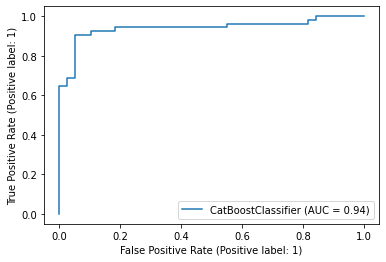

In [16]:
#Write your code for Cat Boost classifier here 
classifier3 = CatBoostClassifier()
classifier3.fit(X_train, y_train)

y_pred = classifier3.predict(X_test)

print("Cat Boost Classifier")
#accuracy, precision, recall, F1 metrics
print(classification_report(y_test, y_pred))

#Confusion Matrix
print('Confusion Matrix\n',metrics.confusion_matrix(y_test, y_pred))
print('\n')

#AUC plot and ROC curve
print('-----AUC Plot and ROC Curve-----')
metrics.plot_roc_curve(classifier3,X_test, y_test) 
plt.show()
print('\n')

*Comment the results of the previous program* 

**Light GBM classifier**

Light GBM Classifier
              precision    recall  f1-score   support

           0       0.85      0.87      0.86        38
           1       0.91      0.89      0.90        54

    accuracy                           0.88        92
   macro avg       0.88      0.88      0.88        92
weighted avg       0.88      0.88      0.88        92

Confusion Matrix
 [[33  5]
 [ 6 48]]


-----AUC Plot and ROC Curve-----


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


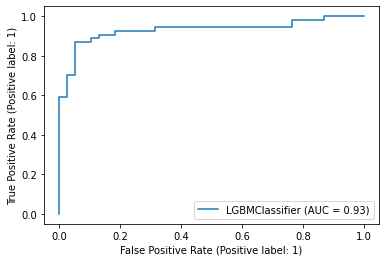

In [17]:
#Write your code for Light GBM classifier here 
classifier4 = lightgbm.LGBMClassifier()
classifier4.fit(X_train, y_train)

y_pred = classifier4.predict(X_test)

print("Light GBM Classifier")
#accuracy, precision, recall, F1 metrics
print(classification_report(y_test, y_pred))

#Confusion Matrix
print('Confusion Matrix\n',metrics.confusion_matrix(y_test, y_pred))
print('\n')

#AUC plot and ROC curve
print('-----AUC Plot and ROC Curve-----')
metrics.plot_roc_curve(classifier4,X_test, y_test) 
plt.show()
print('\n')

Compare the same characteristics calculated with training and test sets. Write the conclusions in the notebook as a text field.

5)	Recalculate the results of Task 1 using MinMaxScaler (use the same random_state as for Standard Scaler by splitting into trainingset and testset) and compare the results based on metric accuracy. Use the Scaler, which gives the best results for the next Tasks. 

Model: Random Forest Classifier 


              precision    recall  f1-score   support

           0       0.84      0.82      0.83        38
           1       0.87      0.89      0.88        54

    accuracy                           0.86        92
   macro avg       0.86      0.85      0.85        92
weighted avg       0.86      0.86      0.86        92

Confusion Matrix
 [[31  7]
 [ 6 48]]


-----AUC Plot and ROC Curve-----


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


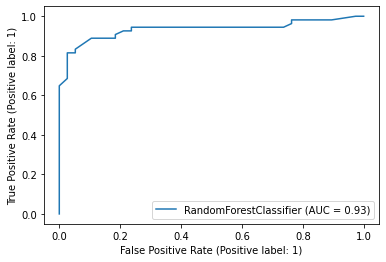




Model: XGBoost Classifier 


              precision    recall  f1-score   support

           0       0.91      0.84      0.88        38
           1       0.89      0.94      0.92        54

    accuracy                           0.90        92
   macro avg       0.90      0.89      0.90        92
weighted avg       0.90      0.90      0.90        92

Confusion Matrix
 [[32  6]
 [ 3 51]]


-----AUC Plot and ROC Curve-----


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


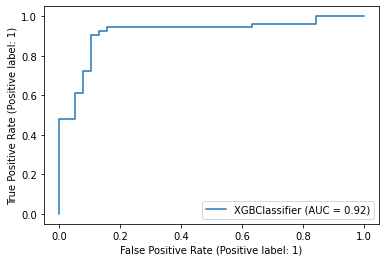




Model: Cat Boost Classifier 


Learning rate set to 0.009495
0:	learn: 0.6844900	total: 1.53ms	remaining: 1.52s
1:	learn: 0.6767899	total: 4.31ms	remaining: 2.15s
2:	learn: 0.6695480	total: 5.83ms	remaining: 1.94s
3:	learn: 0.6618627	total: 7.31ms	remaining: 1.82s
4:	learn: 0.6538726	total: 8.94ms	remaining: 1.78s
5:	learn: 0.6458777	total: 10.5ms	remaining: 1.74s
6:	learn: 0.6381135	total: 12.1ms	remaining: 1.71s
7:	learn: 0.6320704	total: 13.2ms	remaining: 1.64s
8:	learn: 0.6251212	total: 14.7ms	remaining: 1.62s
9:	learn: 0.6184187	total: 16.3ms	remaining: 1.62s
10:	learn: 0.6122335	total: 17.9ms	remaining: 1.61s
11:	learn: 0.6060919	total: 19.4ms	remaining: 1.6s
12:	learn: 0.6002159	total: 20.9ms	remaining: 1.59s
13:	learn: 0.5940946	total: 22.5ms	remaining: 1.58s
14:	learn: 0.5883014	total: 24ms	remaining: 1.57s
15:	learn: 0.5824424	total: 25.5ms	remaining: 1.57s
16:	learn: 0.5778730	total: 27.4ms	remaining: 1.58s
17:	learn: 0.5720374	total: 28.9ms	remaining: 1.58s
18:	learn: 0.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


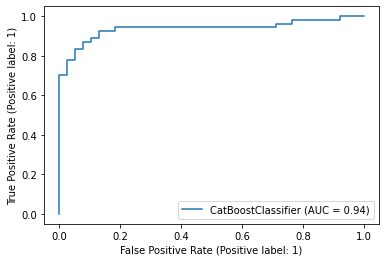




Model: Light GBM Classifier 


              precision    recall  f1-score   support

           0       0.89      0.84      0.86        38
           1       0.89      0.93      0.91        54

    accuracy                           0.89        92
   macro avg       0.89      0.88      0.89        92
weighted avg       0.89      0.89      0.89        92

Confusion Matrix
 [[32  6]
 [ 4 50]]


-----AUC Plot and ROC Curve-----


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


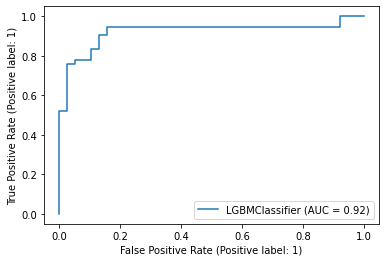

In [18]:
#Write your code here 
#MinMax Scaler
X_train1 = MinMaxScaler().fit_transform(X_train)
X_test1 = MinMaxScaler().fit_transform(X_test)

#Declaring different models
model_name = [
    'Random Forest Classifier',
    'XGBoost Classifier',
    'Cat Boost Classifier',
    'Light GBM Classifier'
]

models = [
    RandomForestClassifier(),
    xgboost.XGBClassifier(),
    CatBoostClassifier(),
    lightgbm.LGBMClassifier()
]

#Classification report, Confusion matrix and ROC
def model_train_report(model,X_train1, X_test1, y_train, y_test):
    model = model.fit(X_train1,y_train)
    y_pred = model.predict(X_test1)
    print(classification_report(y_test, y_pred))
    print('Confusion Matrix\n',metrics.confusion_matrix(y_test, y_pred))
    print('\n')
    #AUC plot and ROC curve
    print('-----AUC Plot and ROC Curve-----')
    metrics.plot_roc_curve(model,X_test1, y_test) 
    plt.show()
    print('\n')

for name,model in zip(model_name,models):
    print(f'Model: {name} \n\n')
    model_train_report(model,X_train1, X_test1, y_train, y_test)
    print()

Using, Minmax Scaler we can clearly see that CatBoost Classifier provides better score compared to the other models. 


# **`Task 2 “Cross validation and grid search of hyperparameter values” `**

1)	Use the function GridSearchCV() to find the best parameters for each ML method. Use 5 fold cross validation. Use accuracy metric as a performance metric.

**Random Forest classifier**

In [29]:
#Write your code here. 
classifier1 = RandomForestClassifier()
classifier1.fit(X_train, y_train)

y_pred = classifier1.predict(X_test)
#cross validation
print('-----Cross Validation-----')
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
cv_score = cross_val_score(classifier1, X_train, y_train,scoring = 'accuracy',cv = kfold)
print(cv_score)
print("Average:",cv_score.mean())
print('\n')
accuracy=accuracy_score(y_pred, y_test)
print('Random Forest Classifier accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

-----Cross Validation-----
[0.88554217 0.84848485 0.89090909 0.85454545 0.85454545]
Average: 0.8668054034319095


Random Forest Classifier accuracy score: 0.8696


**XGBoost classifier**

In [30]:
#Write your code here. 
classifier2 = xgboost.XGBClassifier()
classifier2.fit(X_train, y_train)

y_pred = classifier2.predict(X_test)
#cross validation
print('-----Cross Validation-----')
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
cv_score = cross_val_score(classifier2, X_train, y_train,scoring = 'accuracy',cv = kfold)
print(cv_score)
print("Average:",cv_score.mean())
print('\n')
accuracy=accuracy_score(y_pred, y_test)
print('XGB Classifier accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

-----Cross Validation-----
[0.89156627 0.83636364 0.87272727 0.87878788 0.85454545]
Average: 0.8667981014968966


XGB Classifier accuracy score: 0.9239


**Cat Boost classifier**

In [31]:
#Write your code here. 
classifier1 = CatBoostClassifier()
classifier1.fit(X_train, y_train)

y_pred = classifier1.predict(X_test)
#cross validation
print('-----Cross Validation-----')
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
cv_score = cross_val_score(classifier1, X_train, y_train,scoring = 'accuracy',cv = kfold)
print(cv_score)
print("Average:",cv_score.mean())
print('\n')
accuracy=accuracy_score(y_pred, y_test)
print('Cat Boost Classifier accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Streaming output truncated to the last 5000 lines.
9:	learn: 0.6268386	total: 23.7ms	remaining: 2.34s
10:	learn: 0.6203180	total: 25ms	remaining: 2.25s
11:	learn: 0.6135946	total: 26.4ms	remaining: 2.18s
12:	learn: 0.6083464	total: 27.9ms	remaining: 2.11s
13:	learn: 0.6031027	total: 29.3ms	remaining: 2.06s
14:	learn: 0.5979816	total: 30.6ms	remaining: 2.01s
15:	learn: 0.5928741	total: 32ms	remaining: 1.97s
16:	learn: 0.5883244	total: 33.4ms	remaining: 1.93s
17:	learn: 0.5822831	total: 34.8ms	remaining: 1.9s
18:	learn: 0.5771003	total: 36.2ms	remaining: 1.87s
19:	learn: 0.5717846	total: 37.9ms	remaining: 1.86s
20:	learn: 0.5674555	total: 39.5ms	remaining: 1.84s
21:	learn: 0.5619107	total: 41.1ms	remaining: 1.83s
22:	learn: 0.5572446	total: 42.6ms	remaining: 1.81s
23:	learn: 0.5526102	total: 44.1ms	remaining: 1.79s
24:	learn: 0.5479298	total: 45.7ms	remaining: 1.78s
25:	learn: 0.5457043	total: 46.7ms	remaining: 1.75s
26:	learn: 0.5411611	total: 48.1ms	remaining: 1.73s
27:	learn: 0.535910

**Light GBM classifier**

In [32]:
#Write your code here. 
classifier1 = lightgbm.LGBMClassifier()
classifier1.fit(X_train, y_train)

y_pred = classifier1.predict(X_test)
#cross validation
print('-----Cross Validation-----')
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
cv_score = cross_val_score(classifier1, X_train, y_train,scoring = 'accuracy',cv = kfold)
print(cv_score)
print("Average:",cv_score.mean())
print('\n')
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM classifier accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

-----Cross Validation-----
[0.89759036 0.84242424 0.86666667 0.86666667 0.84242424]
Average: 0.8631544359255203


LightGBM classifier accuracy score: 0.8804


After Kfold cross validation when we compare the results we can find that almost all the models provided a moderate accuracy score. But XGBoost classifier showed a better accuracy rate compared to the rest of the models

2)	Evaluate the built models and found best hyper-parameters with the test set data. Compare the results of different models, comment the result and draw the conclusion about the best forecasting model.

**Random Forest classifier**

In [33]:
#Write your code here 
classifier1 = RandomForestClassifier()

params = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

#GridSearch CV
search = GridSearchCV(classifier1,params, cv=3)

search.fit(X_train, y_train)

print("Best Score: " , search.best_score_)
print("Best Estimator: " , search.best_estimator_)
print("Best Params: " , search.best_params_)

Best Score:  0.8776987263943785
Best Estimator:  RandomForestClassifier(max_depth=100, max_features=2, min_samples_leaf=3,
                       min_samples_split=8, n_estimators=300)
Best Params:  {'bootstrap': True, 'max_depth': 100, 'max_features': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 300}


Random Forest Classifier provided the best hyper parameters for better accuracy. However due to computational cost I had to minimize the number of iterations inorder to get the results soon. Even after reducing the iterations the computationa time was more than 5 minutes. I also figured out that if I use RandomSearchCV instead of GridSearchCV the computation time will be less. Since the question was to use GridSearchCV this was my optimal method to derive.

**XGBoost classifier**

In [63]:
#Write your code here 
classifier2 = xgboost.XGBClassifier()

params = {
    "colsample_bytree": [0.7, 0.3],
    "gamma": [0, 0.5],
    "learning_rate": [0.03, 0.3], # default 0.1 
    "max_depth": [2, 6], # default 3
    "n_estimators": [100, 150], # default 100
    "subsample": [0.6, 0.4]
}

#GridSearch CV
search = GridSearchCV(classifier2,params)

search.fit(X_train, y_train)

print("Best Score: " , search.best_score_)
print("Best Estimator: " , search.best_estimator_)
print("Best Params: " , search.best_params_)

Best Score:  0.8764804673238409
Best Estimator:  XGBClassifier(colsample_bytree=0.3, gamma=0.5, learning_rate=0.03, max_depth=2,
              n_estimators=150, subsample=0.4)
Best Params:  {'colsample_bytree': 0.3, 'gamma': 0.5, 'learning_rate': 0.03, 'max_depth': 2, 'n_estimators': 150, 'subsample': 0.4}


Unlike Random Forest Classifier computational time of XGBoost classifier was quite less. Default iterations were set and hyper parameters were found accordingly

**Cat Boost classifier**

In [67]:
#Write your code here 
classifier3 = CatBoostClassifier()

params = {
    'depth' : [4,5,6,7,8,9, 10],
    'learning_rate' : [0.01,0.02,0.03,0.04],
    'iterations'    : [10, 20,30,40,50,60,70,80,90, 100]
}

#GridSearch CV
search = GridSearchCV(classifier3,params, cv = 3)

search.fit(X_train, y_train)

print("Best Score: " , search.best_score_)
print("Best Estimator: " , search.best_estimator_)
print("Best Params: " , search.best_params_)

Streaming output truncated to the last 5000 lines.
3:	learn: 0.6427648	total: 19.4ms	remaining: 223ms
4:	learn: 0.6315625	total: 25.3ms	remaining: 227ms
5:	learn: 0.6168058	total: 26.2ms	remaining: 192ms
6:	learn: 0.6072804	total: 33.1ms	remaining: 203ms
7:	learn: 0.5952220	total: 36.5ms	remaining: 192ms
8:	learn: 0.5827759	total: 37.3ms	remaining: 170ms
9:	learn: 0.5753734	total: 43.1ms	remaining: 173ms
10:	learn: 0.5680683	total: 49.2ms	remaining: 174ms
11:	learn: 0.5622308	total: 54.8ms	remaining: 174ms
12:	learn: 0.5565801	total: 60.6ms	remaining: 172ms
13:	learn: 0.5503622	total: 74.8ms	remaining: 192ms
14:	learn: 0.5446439	total: 81.9ms	remaining: 191ms
15:	learn: 0.5386638	total: 87.7ms	remaining: 186ms
16:	learn: 0.5338120	total: 93.4ms	remaining: 181ms
17:	learn: 0.5272855	total: 99.2ms	remaining: 176ms
18:	learn: 0.5224788	total: 105ms	remaining: 171ms
19:	learn: 0.5182188	total: 111ms	remaining: 167ms
20:	learn: 0.5125950	total: 117ms	remaining: 162ms
21:	learn: 0.5079916	to

CatBoostClassifier also showed more accurate results when RandomSearchCV was used. However inorder to coordinate it with GridSearchCV iterations were reduced.

**Light GBM classifier**

In [70]:
#Write your code here 

classifier4 = lightgbm.LGBMClassifier()

params = {
    'num_leaves': [6, 50], 
    'min_child_samples': [100, 500], 
    'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
    'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
    'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]
}

#GridSearch CV
search = GridSearchCV(classifier4,params, cv = 3)

search.fit(X_train, y_train)

print("Best Score: " , search.best_score_)
print("Best Estimator: " , search.best_estimator_)
print("Best Params: " , search.best_params_)

Best Score:  0.8728678085199825
Best Estimator:  LGBMClassifier(min_child_samples=100, min_child_weight=1e-05, num_leaves=6,
               reg_alpha=1, reg_lambda=1)
Best Params:  {'min_child_samples': 100, 'min_child_weight': 1e-05, 'num_leaves': 6, 'reg_alpha': 1, 'reg_lambda': 1}


LGBM Classifier had a moderate hyperparameter tuning and even after increasing the iterations almost the similar results were obtained. Therefore the iterations were maintained at a minimal rate.

Which model shows the best performance? Write your answer here.

Model: Random Forest Classifier 


              precision    recall  f1-score   support

           0       0.89      0.82      0.85        38
           1       0.88      0.93      0.90        54

    accuracy                           0.88        92
   macro avg       0.88      0.87      0.88        92
weighted avg       0.88      0.88      0.88        92

Confusion Matrix
 [[31  7]
 [ 4 50]]


-----AUC Plot and ROC Curve-----


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


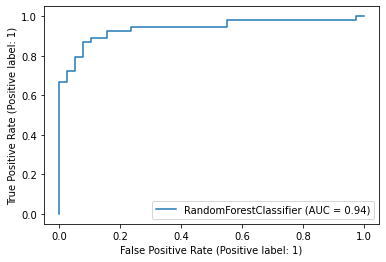




Model: XGBoost Classifier 


              precision    recall  f1-score   support

           0       0.86      0.82      0.84        38
           1       0.88      0.91      0.89        54

    accuracy                           0.87        92
   macro avg       0.87      0.86      0.86        92
weighted avg       0.87      0.87      0.87        92

Confusion Matrix
 [[31  7]
 [ 5 49]]


-----AUC Plot and ROC Curve-----


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


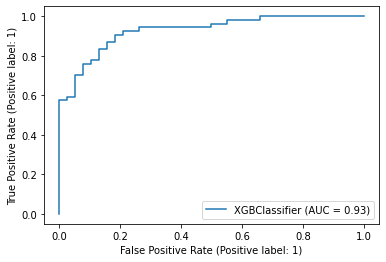




Model: Cat Boost Classifier 


0:	learn: 0.6746632	total: 9.28ms	remaining: 919ms
1:	learn: 0.6574133	total: 10.6ms	remaining: 517ms
2:	learn: 0.6421825	total: 15.4ms	remaining: 497ms
3:	learn: 0.6295051	total: 23.2ms	remaining: 557ms
4:	learn: 0.6159758	total: 28.3ms	remaining: 538ms
5:	learn: 0.6056904	total: 37.4ms	remaining: 586ms
6:	learn: 0.5922907	total: 39.1ms	remaining: 520ms
7:	learn: 0.5828322	total: 43.6ms	remaining: 501ms
8:	learn: 0.5735888	total: 51.5ms	remaining: 521ms
9:	learn: 0.5621512	total: 57.4ms	remaining: 516ms
10:	learn: 0.5526053	total: 63.4ms	remaining: 513ms
11:	learn: 0.5439816	total: 73.9ms	remaining: 542ms
12:	learn: 0.5354200	total: 78.1ms	remaining: 523ms
13:	learn: 0.5257011	total: 82.8ms	remaining: 508ms
14:	learn: 0.5167089	total: 84.6ms	remaining: 479ms
15:	learn: 0.5092506	total: 89.4ms	remaining: 470ms
16:	learn: 0.5017177	total: 97.4ms	remaining: 475ms
17:	learn: 0.4961126	total: 106ms	remaining: 482ms
18:	learn: 0.4892053	total: 113ms	remaini

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


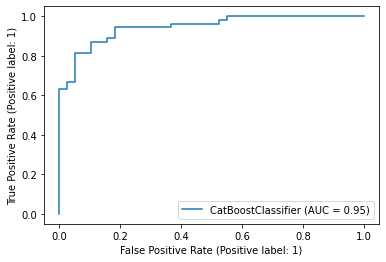




Model: Light GBM Classifier 


              precision    recall  f1-score   support

           0       0.86      0.82      0.84        38
           1       0.88      0.91      0.89        54

    accuracy                           0.87        92
   macro avg       0.87      0.86      0.86        92
weighted avg       0.87      0.87      0.87        92

Confusion Matrix
 [[31  7]
 [ 5 49]]


-----AUC Plot and ROC Curve-----


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


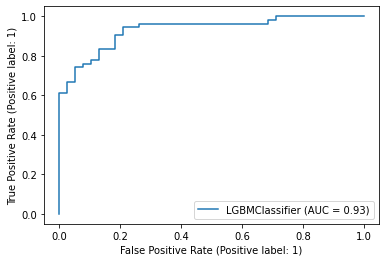

In [36]:
X_train1 = MinMaxScaler().fit_transform(X_train)
X_test1 = MinMaxScaler().fit_transform(X_test)

#Declaring different models
model_name = [
    'Random Forest Classifier',
    'XGBoost Classifier',
    'Cat Boost Classifier',
    'Light GBM Classifier'
]

models = [
    RandomForestClassifier(max_depth=100, max_features=2, min_samples_leaf=3,
                       min_samples_split=8, n_estimators=300),
    xgboost.XGBClassifier(colsample_bytree=0.3, gamma=0.5, learning_rate=0.03, max_depth=2,
              n_estimators=150, subsample=0.4),
    CatBoostClassifier(depth = 8, iterations = 100, learning_rate = 0.04),
    lightgbm.LGBMClassifier(min_child_samples=100, min_child_weight=1e-05, num_leaves=6,
               reg_alpha=1, reg_lambda=1)
]

#Classification report, Confusion matrix and ROC
def model_train_report(model,X_train1, X_test1, y_train, y_test):
    model = model.fit(X_train1,y_train)
    y_pred = model.predict(X_test1)
    print(classification_report(y_test, y_pred))
    print('Confusion Matrix\n',metrics.confusion_matrix(y_test, y_pred))
    print('\n')
    #AUC plot and ROC curve
    print('-----AUC Plot and ROC Curve-----')
    metrics.plot_roc_curve(model,X_test1, y_test) 
    plt.show()
    print('\n')

for name,model in zip(model_name,models):
    print(f'Model: {name} \n\n')
    model_train_report(model,X_train1, X_test1, y_train, y_test)
    print()

After Hyper parameter tuning, based on accuracy almost all the models showed similar results. However based on other features such as AUC Curve we can find Cat Boost classifier to have performed better than the other models 

# **`Task 3 “Classification dashboard” (30 Scores)`**

In [44]:
from IPython.display import clear_output
import plotly.express as px


#Declaring checkbox
Logistic_regression = widgets.Checkbox(value=False, description='Logistic_regression')
DT = widgets.Checkbox(value=False, description='DT')
KNN = widgets.Checkbox(value=False, description='KNN')
SVM = widgets.Checkbox(value=False, description='SVM')
Random_Forest_Classifier = widgets.Checkbox(value=False, description='Random_Forest_Classifier')
XGBoost_Classifier = widgets.Checkbox(value=False, description='XGBoost_Classifier')
Cat_Boost_Classifier = widgets.Checkbox(value=False, description='Cat_Boost_Classifier')
LGBM_Classifier = widgets.Checkbox(value=False, description='LGBM_Classifier')
ui1 = widgets.HBox([Logistic_regression,DT,KNN,SVM,Random_Forest_Classifier,XGBoost_Classifier,Cat_Boost_Classifier,LGBM_Classifier])

#Declaring multiple select
ms = widgets.SelectMultiple(options = ['Accuracy','Precision','Recall','F1 metric','Confusion matrix',"ROC-AUC Curve"],description = 'Performance metrics')
ui2 = widgets.HBox([ms])


#Declaring Tabs
tab = widgets.Tab()
pre_processing_box = widgets.Output()
performance_metrics_box = widgets.Output()
prediction_box = widgets.Output()
accuracy_plot_box = widgets.Output()

tab.titles = ['Pre_processing','Performance_metrics','Prediction','Accuracy plot']
tab.children = [pre_processing_box, performance_metrics_box, prediction_box, accuracy_plot_box]

for i,title in enumerate(['Pre_processing','Performance metrics','Prediction','Accuracy plot']):
  tab.set_title(i,title)

display(widgets.HTML('<br><b><centre><font size="8"> Mithun Srinivasan</font></centre></b>'))
display(ui1)
display(ui2)
display(tab)

#Dividing the dataset into 2 parts: training set and test set (90:10)
X_train1 = MinMaxScaler().fit_transform(X_train)
X_test1 = MinMaxScaler().fit_transform(X_test)
X_train1, X_test1 , y_train1, y_test1 = train_test_split(X,y,test_size = 0.10, random_state=42)

#Declaring functions for individual models
def model_LR(X_train1, X_test1 , y_train1, y_test1):
  classifier = LogisticRegression()
  classifier = classifier.fit(X_train1,y_train)
  y_pred = classifier.predict(X_test1)
  return classifier
    
def model_DT(X_train1, X_test1 , y_train1, y_test1):
  classifier = DecisionTreeClassifier()
  classifier = classifier.fit(X_train1,y_train)
  y_pred = classifier.predict(X_test1)
  return classifier
    
def model_KNN(X_train1, X_test1 , y_train1, y_test1):
  classifier = KNeighborsClassifier()
  classifier = classifier.fit(X_train1,y_train)
  y_pred = classifier.predict(X_test1)
  return classifier
    
def model_SVM(X_train1, X_test1 , y_train1, y_test1):
  classifier = SVC()
  classifier = classifier.fit(X_train1,y_train)
  y_pred = classifier.predict(X_test1)
  return classifier

def model_RF(X_train1, X_test1 , y_train1, y_test1):
  classifier = RandomForestClassifier()
  classifier = classifier.fit(X_train1,y_train1)
  y_pred = classifier.predict(X_test1)
  return classifier
    
def model_XGB(X_train1, X_test1 , y_train1, y_test1):
  classifier = xgboost.XGBClassifier()
  classifier = classifier.fit(X_train1,y_train1)
  y_pred = classifier.predict(X_test1)
  return classifier
    
def model_CatBoost(X_train1, X_test1 , y_train1, y_test1):
  classifier = CatBoostClassifier()
  classifier = classifier.fit(X_train1,y_train1)
  y_pred = classifier.predict(X_test1)
  return classifier
    
def model_LGBM(X_train1, X_test1 , y_train1, y_test1):
  classifier = lightgbm.LGBMClassifier()
  classifier = classifier.fit(X_train1,y_train1)
  y_pred = classifier.predict(X_test1)
  return classifier

#Declaring Tab 1 - Pre-processing
def CM(model):
  #2d bar plots
  g = heart_df.hist(figsize = (14,12))
  #Dimensions of the dataset
  a = X_train1.shape
  b = X_test1.shape
  #Correlation matrix
  cm = heart_df.corr()
  #COunt of elements
  fig = px.bar(heart_df, x = "Age", y = "Sex")
  fig.show()
  return g,a,b,cm

#Declaring tab 2 - Performance metrics
def performance(model):
  acc = classification_report(y_test, y_pred)
  return acc
    
#Declaring tab 4 - Accuracy plot
def accuracy(model):
  acc = metrics.plot_roc_curve(model,X_test1, y_test) 
  plt.show()
  return acc


#Declaring different models
def bandwidth_widget(model):
#Choosing the model from checkbox
  if(model == 'Logistic regression'):
    classifier = model_LR(X_train1, X_test1 , y_train1, y_test1)
    
  elif(model == 'DT'):
    classifier = model_DT(X_train1, X_test1 , y_train1, y_test1)
    
  elif(model == 'KNN'):
    classifier = model_KNN(X_train1, X_test1 , y_train1, y_test1)
    
  elif(model == 'SVM'):
    classifier = model_SVM(X_train1, X_test1 , y_train1, y_test1)
    
  elif(model == 'Random Forest Classifier'):
    classifier = model_RF(X_train1, X_test1 , y_train1, y_test1)
    
  elif(model == 'XGB Classifier'):
    classifier = model_XGB(X_train1, X_test1 , y_train1, y_test1)
      
  elif(model == 'Cat Boost Classifier'):
    classifier = model_CatBoost(X_train1, X_test1 , y_train1, y_test1)
    
  else:
    classifier = model_LGBM(X_train1, X_test1 , y_train1, y_test1)

#Calling the respective tab functions
  df = CM(classifier)
  pm = performance(classifier)
  acc = accuracy(classifier)
  with pre_processing_box:
    clear_output()
    display(df)

#Declaring Tab 3 - predictions
  dd=pd.DataFrame()
  dd['True values'] = y_test
  dd['Predictions'] = y_pred
  dd['True'] = (dd['True values'] == dd['Predictions'])
  with prediction_box:
    clear_output()
    display(dd)

#Declaring Accuracy as a performance metric
  with performance_metrics_box:
    clear_output()
    display(pm)

#Plotting accuracy
  with accuracy_plot_box:
    clear_output()
    display(acc)


out1 = widgets.interactive_output(bandwidth_widget,{'model' : Logistic_regression,'model' : DT,'model' : KNN,'model' : SVM,'model': Random_Forest_Classifier,'model' : XGBoost_Classifier,'model':Cat_Boost_Classifier,'model':LGBM_Classifier})


HTML(value='<br><b><centre><font size="8"> Mithun Srinivasan</font></centre></b>')

As a result, I found creating the dashboard from ipywidgets generated intervative outcome. However the computational time was more. It took plenty of time to display the result while changing from one model to another. Sometimes I had to restart the kernel every time inorder to execute the code. Initially I thought there was an error in my code but however ipywidgets was troublesome to work with. Bar plots disappear sometimes. After working on it, I found LGBM classifier to be the best model.